In [2]:
import atd2022
import torch
import pandas as pd
import numpy as np
from utils.tools import dotdict
from CNN_Forecaster_Wrapper import CNN_Forecaster
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.set_device(1) 

# Testing ATD Protocol

In [7]:
truth = atd2022.io.read_csv()

In [8]:
args = dotdict()

args.dim = 1024
args.use_gpu = True
args.batch_size = 12
args.train_epochs=120
args.lr = 0.00001
args.history_len =52

In [9]:
exp = CNN_Forecaster(args)

In [10]:
exp.fit(truth)

Use GPU: cuda:None
train_loss 4308783.923076923
train_loss 4294529.576923077
train_loss 4283819.346153846
train_loss 4275493.076923077
train_loss 4268672.442307692
train_loss 4262790.653846154
train_loss 4257512.519230769
train_loss 4252653.288461538
train_loss 4248014.769230769
train_loss 4243455.269230769
train_loss 4238857.115384615
train_loss 4234127.230769231
train_loss 4229173.903846154
train_loss 4223959.480769231
train_loss 4218450.75
train_loss 4212600.980769231
train_loss 4206358.807692308
train_loss 4199700.980769231
train_loss 4192607.9423076925
train_loss 4185080.596153846
train_loss 4177113.076923077
train_loss 4168700.326923077
train_loss 4159835.7115384615
train_loss 4150528.7115384615
train_loss 4140776.519230769
train_loss 4130565.423076923
train_loss 4119887.4423076925
train_loss 4108727.2884615385
train_loss 4097065.269230769
train_loss 4084906.519230769
train_loss 4072272.6923076925
train_loss 4059172.25
train_loss 4045604.0576923075
train_loss 4031565.173076923
tr

In [11]:
test=exp.predict([1,2,3,4])

/scratch/wzong/LISP-ATD-2022/CNN/driver/atd_CNN.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float()).cpu().detach().numpy()
/scratch/wzong/LISP-ATD-2022/CNN/CNN_Forecaster_Wrapper.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions[predictions<=0]=0
/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [12]:
test

Region                  AA                                                \
Event                   01    02    03    04   05    06   07    08    09   
2018-02-12/2018-02-18  1.0  20.0  41.0  22.0  6.0   1.0  4.0   0.0   2.0   
2018-02-19/2018-02-25  2.0  13.0   0.0  42.0  8.0   6.0  3.0   0.0  16.0   
2018-02-26/2018-03-04  4.0  11.0   3.0  50.0  0.0   5.0  4.0   0.0  25.0   
2018-03-05/2018-03-11  3.0   6.0   3.0  41.0  0.0  13.0  9.0  17.0   4.0   

Region                                                                         \
Event                    10    11     12    13    14     15    16    17    18   
2018-02-12/2018-02-18   1.0  35.0   46.0  59.0  44.0   45.0  26.0  28.0  76.0   
2018-02-19/2018-02-25   2.0  36.0  111.0  54.0  95.0   65.0  36.0  39.0  59.0   
2018-02-26/2018-03-04  10.0  78.0   56.0  62.0  34.0  132.0  16.0  13.0  34.0   
2018-03-05/2018-03-11  17.0  35.0   50.0  34.0  67.0  112.0  40.0   0.0  26.0   

Region                                 AC                                      \
Event                     19     20    01    02    03    04    05    06    07   
2018-02-12/2018-02-18  104.0  111.0  41.0  12.0  51.0  26.0   0.0  20.0   2.0   
2018-02-19/2018-02-25  120.0   12.0  25.0  12.0   8.0  26.0   5.0   0.0   1.0   
2018-02-26/2018-03-04   43.0    0.0  63.0  12.0  12.0  21.0  43.0  15.0  18.0   
2018-03-05/2018-03-11   60.0    0.0  66.0   1.0   8.0   9.0  12.0  14.0   8.0   

Region                                                                    \
Event                    08    09    10    11     12     13    14     15   
2018-02-12/2018-02-18   7.0   1.0   5.0   1.0    2.0    1.0   3.0    1.0   
2018-02-19/2018-02-25   4.0   3.0   8.0   0.0   24.0   23.0  22.0   44.0   
2018-02-26/2018-03-04  30.0  39.0  85.0  10.0   85.0   69.0  48.0   90.0   
2018-03-05/2018-03-11  33.0   5.0  10.0  31.0  143.0  101.0  76.0  109.0   

Region                                                        AE         \
Event                     16     17     18     19     20      01     02   
2018-02-12/2018-02-18   57.0   86.0  255.0  169.0  185.0   307.0  221.0   
2018-02-19/2018-02-25   71.0   26.0  104.0   94.0  112.0   193.0  289.0   
2018-02-26/2018-03-04  107.0   44.0   43.0  110.0  126.0   217.0  202.0   
2018-03-05/2018-03-11  187.0  108.0   58.0  205.0  108.0  1237.0  130.0   

Region                                                                       \
Event                     03     04     05     06    07    08     09     10   
2018-02-12/2018-02-18   60.0  320.0  106.0  460.0  20.0  12.0   24.0   36.0   
2018-02-19/2018-02-25  419.0  562.0    0.0  713.0  80.0  99.0  159.0  243.0   
2018-02-26/2018-03-04  353.0  517.0   47.0  675.0  93.0  86.0  166.0  184.0   
2018-03-05/2018-03-11  126.0  333.0  185.0  653.0  97.0  68.0  167.0  174.0   

Region                                                                      \
Event                     11    12    13     14    15     16     17     18   
2018-02-12/2018-02-18   97.0  17.0  34.0   58.0   3.0  270.0  144.0  207.0   
2018-02-19/2018-02-25  193.0   0.0  29.0   39.0  15.0  134.0  284.0  165.0   
2018-02-26/2018-03-04  158.0  11.0  19.0   60.0  14.0  274.0  377.0  155.0   
2018-03-05/2018-03-11  212.0  88.0  44.0  172.0  49.0  144.0  255.0   58.0   

Region                                  AF                                \
Event                     19     20     01      02     03      04     05   
2018-02-12/2018-02-18  573.0  132.0  771.0  1761.0  654.0  2212.0  605.0   
2018-02-19/2018-02-25  744.0  201.0  884.0  1898.0  942.0  2238.0  884.0   
2018-02-26/2018-03-04  580.0  498.0  982.0  1718.0  553.0  1630.0  652.0   
2018-03-05/2018-03-11  357.0  347.0  617.0  1772.0  534.0  1895.0  636.0   

Region                                                                        \
Event                     06     07     08     09     10     11     12    13   
2018-02-12/2018-02-18  462.0  160.0   91.0  111.0   32.0  121.0   83.0  62.0   
2018-02-19/2018-02-2

# Full Scale Testing

In [14]:
args = dotdict()

args.dim = 4096
args.use_gpu = True
args.batch_size = 10
args.train_epochs=800
args.lr = 0.0001
args.history_len =52

In [15]:
lispDL = CNN_Forecaster(args)

In [16]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
)

In [17]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<CNN_Forecaster_Wrapper.CNN_Forecaster object at 0x7faa3c346310>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None
train_loss 3696525.375
train_loss 3662968.75
train_loss 3639714.5625
train_loss 3624977.125
train_loss 3607227.4375
train_loss 3589145.5
train_loss 3568630.4375
train_loss 3545454.875
train_loss 3518488.875
train_loss 3486872.625
train_loss 3449630.75
train_loss 3406218.5
train_loss 3355900.625
train_loss 3298177.1875
train_loss 3232875.875
train_loss 3159709.8125
train_loss 3078460.6875
train_loss 2989319.5625
train_loss 2892376.0
train_loss 2788054.3125
train_loss 2676876.125
train_loss 2559311.6875
train_loss 2435780.8125
train_loss 2307025.875
train_loss 2174240.6875
train_loss 2038810.9375
train_loss 1902170.09375
train_loss 1765940.34375
train_loss 1631580.375
train_loss 1500044.40625
train_loss 1372023.9375
train_loss 1247885.9375
train_loss 1127779.90625
train_loss 1012200.5625
train_loss 901857.25
train_loss 797544.46875
train_loss 700545.15625
train_loss 612236.890625
train_loss 533902.7734375
train_loss 466417.3125
train_loss 410026.671875
train_loss 36435

train_loss 45162.099609375
train_loss 45107.37109375
train_loss 45051.84521484375
train_loss 44995.72705078125
train_loss 44941.28173828125
train_loss 44888.287109375
train_loss 44835.15673828125
train_loss 44781.20458984375
train_loss 44727.12255859375
train_loss 44677.779296875
train_loss 44625.75439453125
train_loss 44574.95751953125
train_loss 44523.20263671875
train_loss 44471.3701171875
train_loss 44418.982421875
train_loss 44368.17431640625
train_loss 44315.9140625
train_loss 44266.12841796875
train_loss 44212.46044921875
train_loss 44160.87255859375
train_loss 44111.029296875
train_loss 44057.10546875
train_loss 44007.35693359375
train_loss 43958.47509765625
train_loss 43906.73388671875
train_loss 43856.126953125
train_loss 43806.78564453125
train_loss 43756.63671875
train_loss 43705.283203125
train_loss 43655.458984375
train_loss 43605.0732421875
train_loss 43553.9033203125
train_loss 43502.68994140625
train_loss 43452.7548828125
train_loss 43403.76611328125
train_loss 43352.9

train_loss 32452.0927734375
train_loss 32413.86962890625
train_loss 32377.50390625
train_loss 32341.43603515625
train_loss 32303.0703125
train_loss 32267.44677734375
train_loss 32230.435546875
train_loss 32193.67724609375
train_loss 32157.138671875
train_loss 32119.16455078125
train_loss 32083.9228515625
train_loss 32047.8974609375
train_loss 32009.68115234375
train_loss 31972.80810546875
train_loss 31937.140625
train_loss 31900.1494140625
train_loss 31863.2763671875
train_loss 31828.205078125
train_loss 31790.353515625
train_loss 31756.314453125
train_loss 31719.84619140625
train_loss 31682.48291015625
train_loss 31646.5791015625
train_loss 31609.09228515625
train_loss 31571.87548828125
train_loss 31536.14794921875
train_loss 31498.71533203125
train_loss 31466.1181640625
train_loss 31428.00341796875
train_loss 31391.6201171875
train_loss 31355.513671875
train_loss 31319.3935546875
train_loss 31285.90380859375
train_loss 31250.25341796875
train_loss 31213.5078125
train_loss 31178.27343

/scratch/wzong/LISP-ATD-2022/CNN/driver/atd_CNN.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float()).cpu().detach().numpy()
/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/scratch/wzong/LISP-ATD-2022/CNN/CNN_Forecaster_Wrapper.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

train_loss 3667170.0
train_loss 3650695.0625
train_loss 3638605.5625
train_loss 3623911.8125
train_loss 3609142.875
train_loss 3592424.0
train_loss 3574314.375
train_loss 3553623.375
train_loss 3530180.6875
train_loss 3503382.0625
train_loss 3472902.9375
train_loss 3438550.6875
train_loss 3400071.875
train_loss 3357309.875
train_loss 3310028.875
train_loss 3258175.3125
train_loss 3201570.25
train_loss 3139705.375
train_loss 3072053.4375
train_loss 2998346.875
train_loss 2918268.75
train_loss 2830561.6875
train_loss 2733796.125
train_loss 2628367.0
train_loss 2514806.625
train_loss 2394761.65625
train_loss 2269302.1875
train_loss 2138891.125
train_loss 2004275.84375
train_loss 1866383.09375
train_loss 1726368.5
train_loss 1585376.125
train_loss 1444656.65625
train_loss 1305454.3125
train_loss 1168878.265625
train_loss 1036177.65625
train_loss 908753.09375
train_loss 788272.109375
train_loss 676153.46875
train_loss 573357.375
train_loss 480810.0
train_loss 399677.5390625
train_loss 33041

train_loss 46576.76611328125
train_loss 46527.7578125
train_loss 46477.880859375
train_loss 46427.38330078125
train_loss 46379.53125
train_loss 46329.9326171875
train_loss 46279.80322265625
train_loss 46230.763671875
train_loss 46181.939453125
train_loss 46133.44775390625
train_loss 46084.7802734375
train_loss 46036.83740234375
train_loss 45986.822265625
train_loss 45939.41650390625
train_loss 45890.07861328125
train_loss 45841.9970703125
train_loss 45793.63330078125
train_loss 45745.27587890625
train_loss 45696.89599609375
train_loss 45647.505859375
train_loss 45601.3232421875
train_loss 45552.994140625
train_loss 45504.38037109375
train_loss 45457.5712890625
train_loss 45408.82080078125
train_loss 45360.73828125
train_loss 45314.05126953125
train_loss 45267.44482421875
train_loss 45218.4833984375
train_loss 45172.31494140625
train_loss 45125.1240234375
train_loss 45077.4970703125
train_loss 45031.419921875
train_loss 44984.28564453125
train_loss 44938.2470703125
train_loss 44891.4921

train_loss 34366.876953125
train_loss 34328.1669921875
train_loss 34291.61376953125
train_loss 34253.1650390625
train_loss 34216.54150390625
train_loss 34177.5263671875
train_loss 34140.822265625
train_loss 34103.9287109375
train_loss 34066.27685546875
train_loss 34032.54345703125
train_loss 33993.0146484375
train_loss 33956.54541015625
train_loss 33920.35009765625
train_loss 33883.85888671875
train_loss 33846.951171875
train_loss 33809.28515625
train_loss 33771.2880859375
train_loss 33734.466796875
train_loss 33698.44091796875
train_loss 33663.40625
train_loss 33623.876953125
train_loss 33588.17431640625
train_loss 33550.9326171875
train_loss 33514.20263671875
train_loss 33476.5546875
train_loss 33439.61083984375
train_loss 33403.2626953125
train_loss 33367.927734375
train_loss 33330.6943359375
train_loss 33294.53271484375
train_loss 33257.318359375
train_loss 33220.94580078125
train_loss 33182.3515625
train_loss 33144.77880859375
train_loss 33110.0439453125
train_loss 33073.287597656

train_loss 64776.6572265625
train_loss 64551.6181640625
train_loss 64334.7509765625
train_loss 64124.732421875
train_loss 63919.314453125
train_loss 63716.9345703125
train_loss 63516.505859375
train_loss 63319.9365234375
train_loss 63125.7744140625
train_loss 62935.12109375
train_loss 62747.373046875
train_loss 62562.8681640625
train_loss 62378.8701171875
train_loss 62197.9091796875
train_loss 62018.892578125
train_loss 61842.7109375
train_loss 61669.142578125
train_loss 61497.498046875
train_loss 61326.9638671875
train_loss 61158.587890625
train_loss 60991.611328125
train_loss 60826.4990234375
train_loss 60663.166015625
train_loss 60501.71484375
train_loss 60341.7216796875
train_loss 60184.208984375
train_loss 60029.1376953125
train_loss 59874.591796875
train_loss 59722.0927734375
train_loss 59572.3125
train_loss 59423.4052734375
train_loss 59275.8671875
train_loss 59129.8720703125
train_loss 58985.3642578125
train_loss 58842.0625
train_loss 58700.2080078125
train_loss 58560.567382812

train_loss 38755.6552734375
train_loss 38708.85302734375
train_loss 38662.396484375
train_loss 38614.81396484375
train_loss 38567.70361328125
train_loss 38522.3759765625
train_loss 38475.52001953125
train_loss 38428.7763671875
train_loss 38381.53515625
train_loss 38335.125
train_loss 38289.3173828125
train_loss 38242.7470703125
train_loss 38197.271484375
train_loss 38152.3427734375
train_loss 38104.82470703125
train_loss 38059.56640625
train_loss 38015.39013671875
train_loss 37968.57373046875
train_loss 37923.24462890625
train_loss 37878.25146484375
train_loss 37832.30078125
train_loss 37788.22900390625
train_loss 37742.59130859375
train_loss 37697.791015625
train_loss 37653.115234375
train_loss 37607.603515625
train_loss 37564.22265625
train_loss 37519.1845703125
train_loss 37474.7060546875
train_loss 37430.142578125
train_loss 37385.83984375
train_loss 37341.36865234375
train_loss 37298.6591796875
train_loss 37253.0673828125
train_loss 37207.38330078125
train_loss 37164.7119140625
tr

train_loss 27692.1533203125
train_loss 27656.359375
train_loss 27624.255859375
train_loss 27591.24853515625
train_loss 27560.1005859375
train_loss 27530.3818359375
train_loss 27504.16552734375
train_loss 27480.01904296875
train_loss 27455.4326171875
train_loss 27429.9892578125
train_loss 27401.6181640625
train_loss 27368.97509765625
train_loss 27331.91796875
train_loss 27292.85595703125
train_loss 27258.89208984375
train_loss 27224.25
train_loss 27190.8916015625
train_loss 27158.55126953125
train_loss 27127.21142578125
train_loss 27101.2333984375
train_loss 27079.94140625
train_loss 27061.64599609375
train_loss 27042.6669921875
train_loss 27019.6015625
train_loss 26989.2705078125
train_loss 26953.2666015625
train_loss 26913.9384765625
train_loss 26874.41748046875
train_loss 26839.31982421875
train_loss 26804.15380859375
train_loss 26769.349609375
train_loss 26736.99658203125
train_loss 26711.56884765625
train_loss 26690.65283203125
train_loss 26675.8984375
train_loss 26662.7333984375
t

train_loss 65997.71875
train_loss 65918.44921875
train_loss 65836.815625
train_loss 65756.85546875
train_loss 65679.05234375
train_loss 65598.45078125
train_loss 65522.25078125
train_loss 65440.6078125
train_loss 65363.56015625
train_loss 65285.12265625
train_loss 65206.6421875
train_loss 65126.99609375
train_loss 65050.42734375
train_loss 64972.70859375
train_loss 64895.03359375
train_loss 64819.8046875
train_loss 64742.50546875
train_loss 64665.76796875
train_loss 64592.728125
train_loss 64514.50859375
train_loss 64439.36953125
train_loss 64364.33125
train_loss 64289.1703125
train_loss 64214.59375
train_loss 64140.60859375
train_loss 64065.53984375
train_loss 63992.08984375
train_loss 63919.8828125
train_loss 63845.75390625
train_loss 63771.99453125
train_loss 63701.63984375
train_loss 63627.25078125
train_loss 63555.965625
train_loss 63481.08828125
train_loss 63410.059375
train_loss 63335.921875
train_loss 63265.253125
train_loss 63191.26796875
train_loss 63120.959375
train_loss 630

train_loss 47218.242578125
train_loss 47169.422265625
train_loss 47120.483203125
train_loss 47068.33671875
train_loss 47020.133203125
train_loss 46969.658984375
train_loss 46928.76953125
train_loss 46898.834765625
train_loss 46885.613671875
train_loss 46882.8625
train_loss 46884.233984375
train_loss 46871.343359375
train_loss 46829.40390625
train_loss 46760.96328125
train_loss 46683.876171875
train_loss 46614.058203125
train_loss 46552.25234375
train_loss 46486.78984375
train_loss 46419.496484375
train_loss 46357.96484375
train_loss 46308.402734375
train_loss 46276.7828125
train_loss 46258.35234375
train_loss 46240.392578125
train_loss 46209.569140625
train_loss 46163.41015625
train_loss 46109.769921875
train_loss 46048.602734375
train_loss 45993.296484375
train_loss 45940.133203125
train_loss 45889.4265625
train_loss 45841.131640625
train_loss 45796.328515625
train_loss 45757.890625
train_loss 45719.535546875
train_loss 45685.53125
train_loss 45648.5734375
train_loss 45613.405078125
t

train_loss 90514.6734375
train_loss 90091.5671875
train_loss 89676.24375
train_loss 89270.6703125
train_loss 88872.5828125
train_loss 88490.71328125
train_loss 88125.6171875
train_loss 87771.89765625
train_loss 87431.91171875
train_loss 87113.61484375
train_loss 86811.9703125
train_loss 86526.63828125
train_loss 86253.13203125
train_loss 85987.79140625
train_loss 85729.09140625
train_loss 85475.371875
train_loss 85225.83203125
train_loss 84980.99140625
train_loss 84741.6328125
train_loss 84505.63125
train_loss 84274.88828125
train_loss 84044.73203125
train_loss 83824.1046875
train_loss 83606.44609375
train_loss 83393.29140625
train_loss 83182.36328125
train_loss 82976.55
train_loss 82772.5265625
train_loss 82571.759375
train_loss 82374.71796875
train_loss 82180.26796875
train_loss 81989.38515625
train_loss 81801.58125
train_loss 81614.92421875
train_loss 81432.07109375
train_loss 81252.33515625
train_loss 81075.6375
train_loss 80902.40625
train_loss 80732.27890625
train_loss 80563.8734

train_loss 57163.746875
train_loss 57115.24609375
train_loss 57064.76796875
train_loss 57015.16875
train_loss 56966.978125
train_loss 56917.54453125
train_loss 56868.57421875
train_loss 56819.4765625
train_loss 56772.15078125
train_loss 56722.48828125
train_loss 56672.46484375
train_loss 56625.3359375
train_loss 56573.965625
train_loss 56527.71328125
train_loss 56478.465625
train_loss 56431.96953125
train_loss 56380.4
train_loss 56333.2484375
train_loss 56284.86640625
train_loss 56236.63984375
train_loss 56187.3015625
train_loss 56140.134375
train_loss 56092.18046875
train_loss 56044.23125
train_loss 55995.2984375
train_loss 55948.396875
train_loss 55899.77265625
train_loss 55853.55625
train_loss 55803.98359375
train_loss 55756.91484375
train_loss 55709.384375
train_loss 55663.0828125
train_loss 55613.42578125
train_loss 55566.96953125
train_loss 55519.1859375
train_loss 55472.06640625
train_loss 55424.65625
train_loss 55379.35078125
train_loss 55329.271875
train_loss 55282.53046875
tr

train_loss 43664.787890625
train_loss 43621.166796875
train_loss 43582.00078125
train_loss 43539.89453125
train_loss 43496.155078125
train_loss 43455.7390625
train_loss 43417.2890625
train_loss 43381.53515625
train_loss 43351.72265625
train_loss 43328.429296875
train_loss 43312.11796875
train_loss 43305.3875
train_loss 43306.918359375
train_loss 43318.129296875
train_loss 43333.73515625
train_loss 43351.648828125
train_loss 43360.548046875
train_loss 43355.80625
train_loss 43327.64609375
train_loss 43289.42734375
train_loss 43251.27109375
train_loss 43237.4859375
train_loss 43250.43046875
train_loss 43279.21796875
train_loss 43274.4734375
train_loss 43193.7140625
train_loss 43036.6390625
train_loss 42880.766796875
train_loss 42825.426171875
train_loss 42887.02109375
train_loss 42982.791015625
train_loss 42994.49375
train_loss 42884.141796875
train_loss 42713.144140625
train_loss 42575.9078125
train_loss 42493.51328125
train_loss 42431.960546875
train_loss 42359.01640625
train_loss 4228

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CNN_Forecaster_Wrapper.CNN_Forecaster object at 0x7faa3c434af0>,4.708677,273.450884
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0                 4.076431   
                                                   1                 4.523444   
                                                   2                 4.862284   
                                                   3                 5.372548   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0        227.563671  
                                                   1        252.270497  
                                                   2        270.569282  
                                                   3        297.696294  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

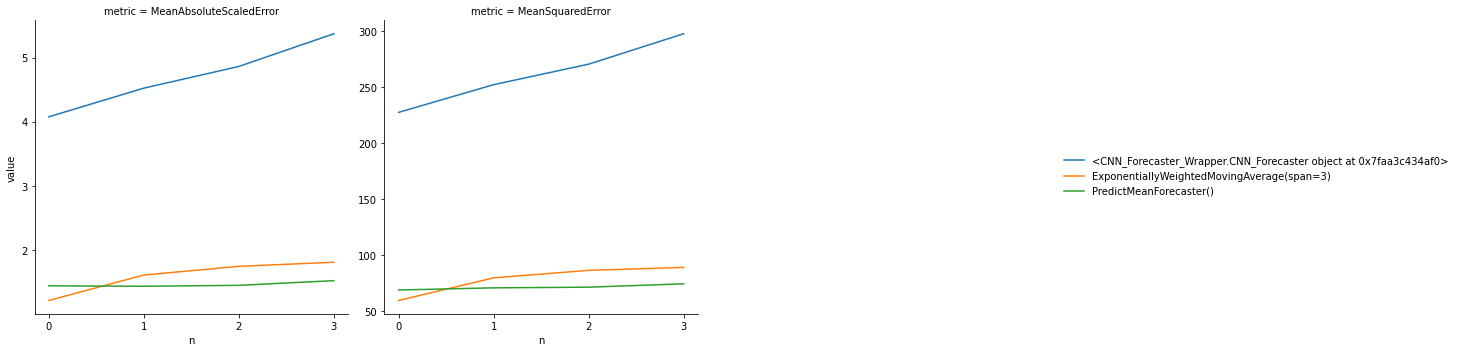

In [13]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))